In [85]:
## Important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [86]:
## Dataset load
df=pd.read_csv("data (4).csv")

In [87]:
## Top 5 features of the dataset
df.head()

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


In [88]:
## Drop unnecessary columns
df.drop(['Unnamed: 0.1','Unnamed: 0','name'],axis=1,inplace=True)

In [89]:
## Shape of the dataset
df.shape

(893, 15)

In [90]:
## Null value check
df.isna().sum()

brand                0
price                0
spec_rating          0
processor            0
CPU                  0
Ram                  0
Ram_type             0
ROM                  0
ROM_type             0
GPU                  0
display_size         0
resolution_width     0
resolution_height    0
OS                   0
warranty             0
dtype: int64

In [91]:
## Remove duplicate values
df.drop_duplicates(inplace=True)

In [92]:
## General information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 892
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              891 non-null    object 
 1   price              891 non-null    int64  
 2   spec_rating        891 non-null    float64
 3   processor          891 non-null    object 
 4   CPU                891 non-null    object 
 5   Ram                891 non-null    object 
 6   Ram_type           891 non-null    object 
 7   ROM                891 non-null    object 
 8   ROM_type           891 non-null    object 
 9   GPU                891 non-null    object 
 10  display_size       891 non-null    float64
 11  resolution_width   891 non-null    float64
 12  resolution_height  891 non-null    float64
 13  OS                 891 non-null    object 
 14  warranty           891 non-null    int64  
dtypes: float64(4), int64(2), object(9)
memory usage: 111.4+ KB


In [93]:
## Unique values check in each feature of the dataset
for i in df.columns:
    print(i,'\n')
    print(df[i].unique(),'\n')

brand 

['HP' 'Acer' 'Lenovo' 'Apple' 'Dell' 'Asus' 'Samsung' 'Ultimus'
 'Primebook' 'MSI' 'Infinix' 'Wings' 'Honor' 'Zebronics' 'Xiaomi' 'iBall'
 'Chuwi' 'Realme' 'Avita' 'Walker' 'Huawei' 'Tecno' 'Gigabyte' 'Vaio'
 'Microsoft' 'Fujitsu' 'LG' 'Ninkear' 'Razer' 'AXL'] 

price 

[ 49900  39900  26990  59729  69990  39990  36790  76990  48990  74990
  49990  10990  72990  29990  53649  33990  79990  68990  45990 104990
  54990  49580  55990  43990  19850  28990  54999  70990  56889 179880
  53790  37990  96990  71990  59990  62990  30990  36490  77990  41190
  89990 399999  31990  31490  70590  23990  37999  52990  30849  58990
  34990  51780  85990 148990  84490  60990  35990  65990  61990  36990
  50970 184999 109990  42990  39150  92999  80990  55850  38990  53990
 139234  57990  89999  92990  59089  72999 126742 126990  74390  98174
  18990  41950  46990   9999  40990  88990  80739  69501  64990  37729
  50712  44990  52101  69490  39965  46999  83990  51499  50990  27990
  84390  24

### Insights
By the seeing the output of the above code we can say that there are some spaces present before, after and in some places of the data present in the categorical features

In [94]:
## Remove unnecessary space before and after the data present in the categorical column
for i in df.dtypes[df.dtypes=='object'].index:
    a=[]
    for j in df[i]:
        j=j.strip()
        a.append(j)
    df[i]=a

In [95]:
## Remove unnecessary space in the data present in the categorical column
for i in df.dtypes[df.dtypes=='object'].index:
    df[i]=df[i].str.replace(r'\s+', ' ', regex=True)

In [96]:
for i in df.columns:
    print(i,'\n')
    print(df[i].unique(),'\n')

brand 

['HP' 'Acer' 'Lenovo' 'Apple' 'Dell' 'Asus' 'Samsung' 'Ultimus'
 'Primebook' 'MSI' 'Infinix' 'Wings' 'Honor' 'Zebronics' 'Xiaomi' 'iBall'
 'Chuwi' 'Realme' 'Avita' 'Walker' 'Huawei' 'Tecno' 'Gigabyte' 'Vaio'
 'Microsoft' 'Fujitsu' 'LG' 'Ninkear' 'Razer' 'AXL'] 

price 

[ 49900  39900  26990  59729  69990  39990  36790  76990  48990  74990
  49990  10990  72990  29990  53649  33990  79990  68990  45990 104990
  54990  49580  55990  43990  19850  28990  54999  70990  56889 179880
  53790  37990  96990  71990  59990  62990  30990  36490  77990  41190
  89990 399999  31990  31490  70590  23990  37999  52990  30849  58990
  34990  51780  85990 148990  84490  60990  35990  65990  61990  36990
  50970 184999 109990  42990  39150  92999  80990  55850  38990  53990
 139234  57990  89999  92990  59089  72999 126742 126990  74390  98174
  18990  41950  46990   9999  40990  88990  80739  69501  64990  37729
  50712  44990  52101  69490  39965  46999  83990  51499  50990  27990
  84390  24

## Insights
By seeing the output of the above code we can say that all the unccessarly spaces are removed from data point present in the categorical features

In [97]:
## Replace duplicate datapoints
df['GPU'].replace({'Intel Iris Xe Graphic':'Intel Iris Xe Graphics'},inplace=True)
df['processor'].replace({'7th Gen Amd Ryzen 5 7535HS':'7th Gen AMD Ryzen 5 7535HS',
                         '7th Gen Amd Ryzen 7 7745HX':'7th Gen AMD Ryzen 7 7745HX',
                         '7th Gen Amd Ryzen 5 7530U':'7th Gen AMD Ryzen 5 7530U',
                        '7th Gen Amd Ryzen 9 7940HS':'7th Gen AMD Ryzen 9 7940HS',
                        '7th Gen Amd Ryzen 7 7840H':'7th Gen Amd Ryzen 7 7840H',
                        '13th Gen \u200eIntel Core i5 1335U':'13th Gen Intel Core i5 1335U',
                        '13th Gen \u200eIntel Core i3 1315U':'13th Gen Intel Core i3 1315U',
                        '7th Gen Amd Ryzen 5 7520U':'7th Gen AMD Ryzen 5 7520U'},inplace=True)

In [98]:
## Detail of laptop which is sold at maximum price
df[df['price']==df['price'].max()]

,brand,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
288,Dell,450039,83.0,13th Gen Intel Core i9 13980HX,"24 Cores (8P + 16E), 32 Threads",64GB,LPDDR5,1TB,SSD,16GB NVIDIA GeForce RTX 4090,18.0,3200.0,1800.0,Windows 11 OS,1


In [99]:
## Detail of laptop which is sold at minimum price
df[df['price']==df['price'].min()]

,brand,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
105,iBall,9999,69.323529,Intel Atom Quad Core Z3735F,Quad Core,2GB,DDR3,32GB,Hard-Disk,Intel HD Graphics,11.6,1366.0,768.0,Windows 10 OS,1


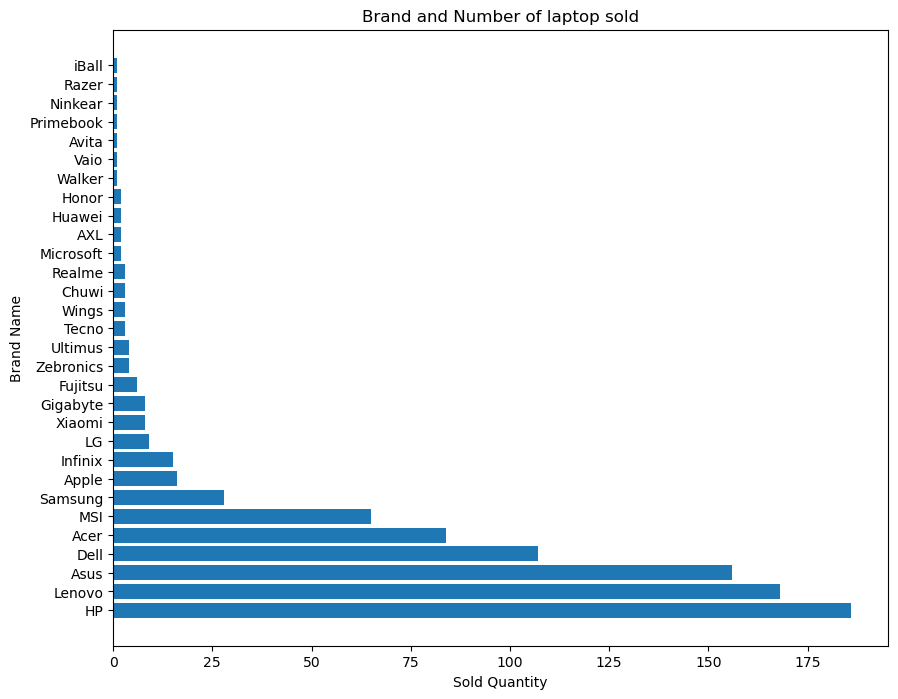

In [100]:
## Horizontal Bar Graph Between Brand and Number of laptop sold
plt.figure(figsize=(10,8))
plt.title("Brand and Number of laptop sold")
plt.barh(y=df['brand'].value_counts().index,width=df['brand'].value_counts())
plt.xlabel("Sold Quantity")
plt.ylabel("Brand Name")
plt.show()

## Insights
From the above graph we can say that Hp sold the maximum number of laptop and iBall sold minimum number of laptops

In [101]:
## Replace all the categorical values in integer values
df['Ram'].replace({'8GB': 8,
                   '16GB':16,
                   '4GB':4,
                   '32GB':32,
                   '2GB':2,
                   '12GB':12,
                   '64GB':64},inplace=True)
df['ROM'].replace({'512GB':512,
                   '256GB':256,
                   '128GB':128,
                   '64GB' :64, 
                   '1TB':1024, 
                   '32GB':32,
                   '2TB':2048},inplace=True)

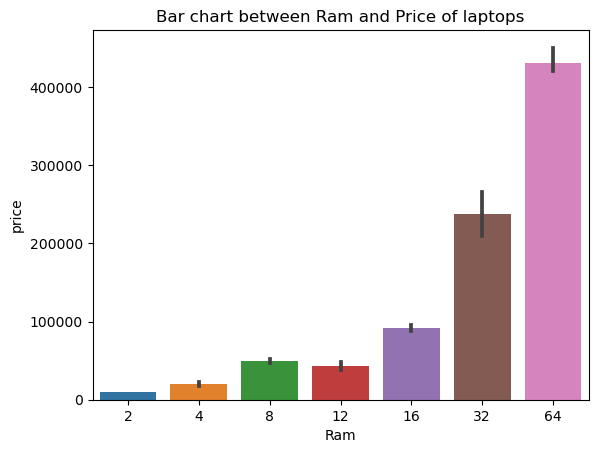

In [102]:
## Barchart between  Ram and price of laptops
plt.title('Bar chart between Ram and Price of laptops')
sns.barplot(data=df,x='Ram',y='price')
plt.show()

## Insights 
1.) By seeing the above graph we can say that price of the laptop is highly correlated with the RAM of the laptop

2.) laptops those have 64 GB RAM are sold at Maximum price

3.) laptops those have 2 GB RAM are sold at minimum price

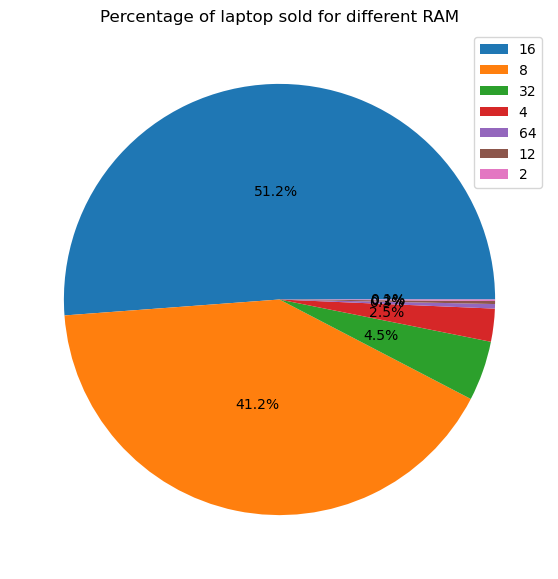

In [103]:
## Piechart between laptop sold and different RAM 
plt.figure(figsize=(7,7))
plt.title("Percentage of laptop sold for different RAM")
plt.pie(df['Ram'].value_counts(),autopct='%1.1f%%',pctdistance=0.50,textprops={'fontsize': 10})
plt.legend(labels=df['Ram'].value_counts().index)
plt.show()

## Insights
1.) By seeing the graph we can say that quantity of laptops those have 16 GB Ram is sold maximum.

2.) Second most selling laptops have 8 GB Ram.

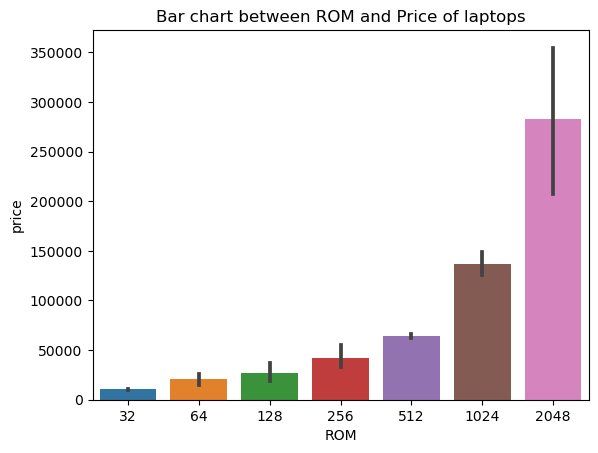

In [104]:
## Barchart between ROM and price of laptops
plt.title('Bar chart between ROM and Price of laptops')
sns.barplot(data=df,x='ROM',y='price')
plt.show()

## Insights 
1.) By seeing the above graph we can say that price of the laptops is highly correlated with the ROM of the laptops

2.) laptops those have 2048 GB ROM are sold at Maximum price

3.) laptops those have 32 GB ROM are sold at minimum price

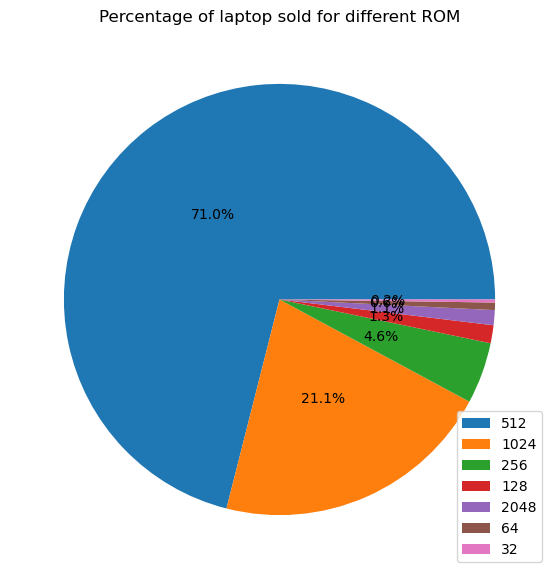

In [105]:
## Piechart between laptop sold and different RAM 
plt.figure(figsize=(7,7))
plt.title("Percentage of laptop sold for different ROM")
plt.pie(df['ROM'].value_counts(),autopct='%1.1f%%',pctdistance=0.50,textprops={'fontsize': 10})
plt.legend(labels=df['ROM'].value_counts().index)
plt.show()

## Insights
1.) By seeing the graph we can say that quantity of laptops those have 512 GB ROM is sold maximum.

2.) Second most selling laptops have 1024 GB ROM.

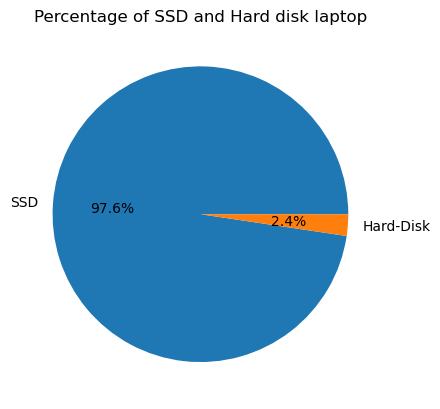

In [106]:
## Percentage of SSD and Hard-Disk
plt.title('Percentage of SSD and Hard disk laptop')
plt.pie(df['ROM_type'].value_counts(),autopct='%1.1f%%',labels=df['ROM_type'].value_counts().index)
plt.show()

## Insights

1.) Percentage sold of laptops those have SSD is very much higher then that of Hard-Disk

2.) Percentage sold of laptops those have SSD is 97.6%

3.) Percentage sold of laptops those have Hard-Disk is 2.4%

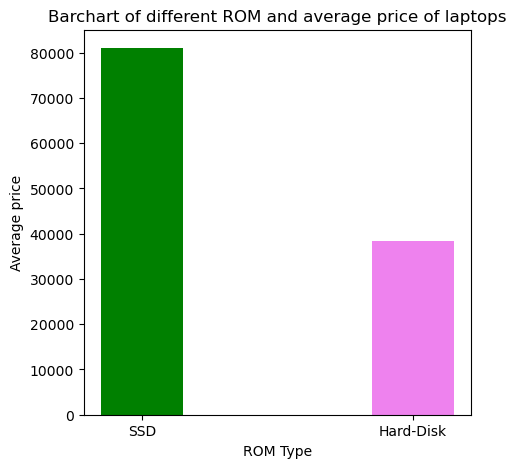

In [127]:
## Barchart of different ROM Type and average price of laptops
y1=df[df['ROM_type']=='SSD']['price'].mean()
y2=df[df['ROM_type']=='Hard-Disk']['price'].mean()
y=[y1,y2]
x=['SSD','Hard-Disk']
plt.figure(figsize=(5,5))
plt.title("Barchart of different ROM and average price of laptops")
plt.bar(x,height=y,color=('Green','Violet'),width=0.3)
plt.xlabel("ROM Type")
plt.ylabel("Average price")
plt.show()

## Insights
1.) Laptops those have ROM type is SSD are costly as compare to Hard-Disk

2.) Average price of laptops those have ROM type is SSD is approx. 80000

3.) Average price of laptops those have ROM type is Hard-disk is approx. 40000 

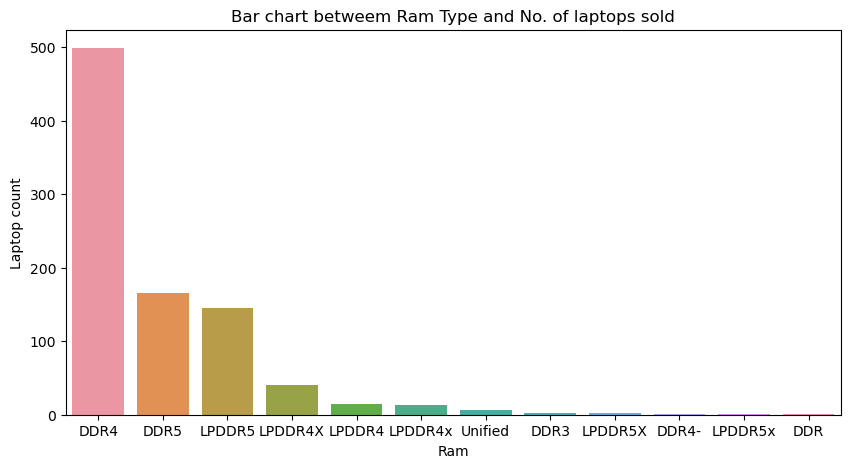

In [25]:
## Barchart between Different Ram Type and No. of laptops sold
plt.figure(figsize=(10,5))
plt.title('Bar chart betweem Ram Type and No. of laptops sold')
sns.barplot(y=df['Ram_type'].value_counts(),x=df['Ram_type'].value_counts().index)
plt.xlabel('Ram')
plt.ylabel('Laptop count')
plt.show()

## Insights
1.) By seeing the above graph we can say that quantity of laptops those have DDR4 Ram Type is sold maximum.

2.) The quantity of laptops those have DDR Ram Type is sold minimum.

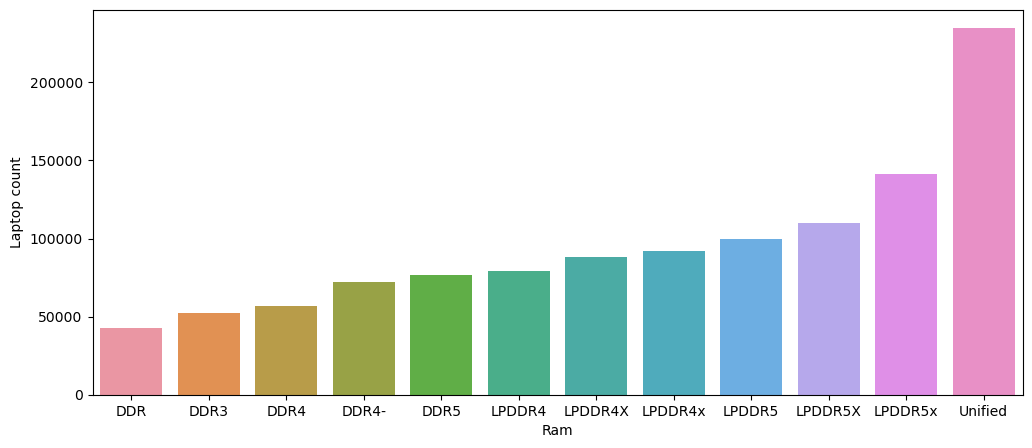

In [139]:
### Barchart of different RAM Type and average price of laptops
y=df.groupby('Ram_type')['price'].mean().sort_values()
x=df.groupby('Ram_type')['price'].mean().sort_index().index
plt.figure(figsize=(12,5))
sns.barplot(y=y,x=x)
plt.xlabel('Ram')
plt.ylabel('Laptop count')
plt.show()

## Insights

1.) Laptops those have Ram type is Unified are costly as compare to other laptops

2.) The most cheapest laptops have DDR as a Ram type

3.) Average price of laptops those have Ram type is Unified is approx. 250000

4.) Average price of laptops those have Ram type is DDR is approx. 40000

In [26]:
## General discription about mathematical features
df.describe()

,price,spec_rating,Ram,ROM,display_size,resolution_width,resolution_height,warranty
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000
mean,79907.409854,69.379026,13.251960,616.206047,15.173751,2035.393057,1218.324748,1.079507
std,60880.043823,5.541555,6.476961,278.459363,0.939095,426.076009,326.756883,0.326956
min,9999.000000,60.000000,2.000000,32.000000,11.600000,1080.000000,768.000000,0.000000
25%,44500.000000,66.000000,8.000000,512.000000,14.000000,1920.000000,1080.000000,1.000000
50%,61990.000000,69.323529,16.000000,512.000000,15.600000,1920.000000,1080.000000,1.000000
75%,90990.000000,71.000000,16.000000,512.000000,15.600000,1920.000000,1200.000000,1.000000
max,450039.000000,89.000000,64.000000,2048.000000,18.000000,3840.000000,3456.000000,3.000000


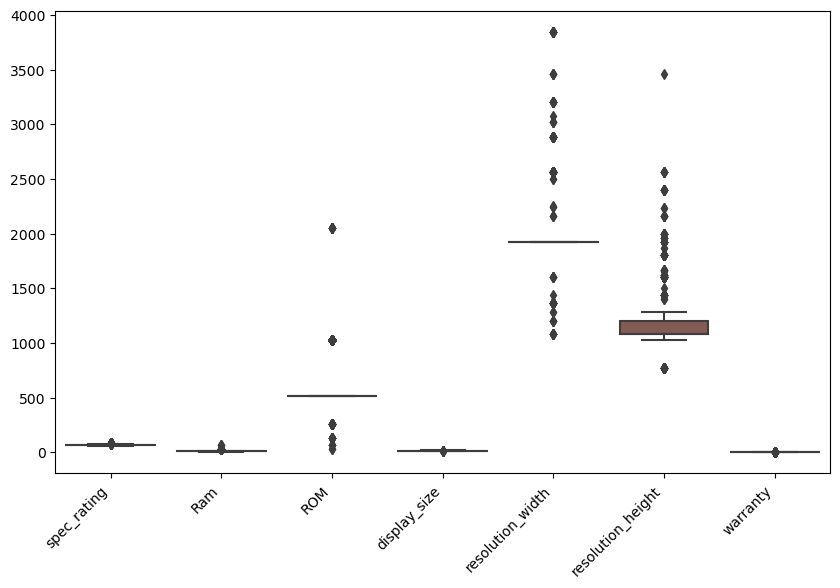

In [153]:
## Outlier check
plt.figure(figsize=(10,6))
sns.boxplot(df.drop('price',axis=1))
plt.xticks(rotation=45,ha='right')
plt.show()

In [154]:
## Label encoding
from sklearn.preprocessing import LabelEncoder
lencoder=LabelEncoder()
df['brand']=lencoder.fit_transform(df['brand'])
df['OS']=lencoder.fit_transform(df['OS'])

In [155]:
## Target guided encoding
mean_data=df.groupby('processor')['price'].mean().to_dict()

In [156]:
df['processor']=df['processor'].map(mean_data)

In [157]:
mean_data=df.groupby('CPU')['price'].mean().to_dict()

In [158]:
df['CPU']=df['CPU'].map(mean_data)

In [159]:
mean_data=df.groupby('GPU')['price'].mean().to_dict()

In [160]:
df['GPU']=df['GPU'].map(mean_data)

In [161]:
mean_data=df.groupby('Ram_type')['price'].mean().to_dict()

In [162]:
df['Ram_type']=df['Ram_type'].map(mean_data)

In [163]:
mean_data=df.groupby('ROM_type')['price'].mean().to_dict()

In [164]:
df['ROM_type']=df['ROM_type'].map(mean_data)

In [165]:
df.head()

,brand,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,9,49900,73.000000,57906.206897,57431.142857,8,57012.082329,512,81013.229885,49945.000000,15.6,1920.0,1080.0,10,1
1,9,39900,60.000000,40268.621622,41612.883721,8,57012.082329,512,81013.229885,46067.818182,15.6,1920.0,1080.0,10,1
2,1,26990,69.323529,35331.625000,33696.400000,8,57012.082329,512,81013.229885,90224.614035,14.0,1920.0,1080.0,10,1
3,14,59729,66.000000,69184.333333,98263.879518,16,92189.451389,512,81013.229885,67899.392157,14.0,2240.0,1400.0,10,1
4,2,69990,69.323529,69990.000000,111990.000000,8,57012.082329,256,81013.229885,91490.000000,13.3,2560.0,1600.0,7,1


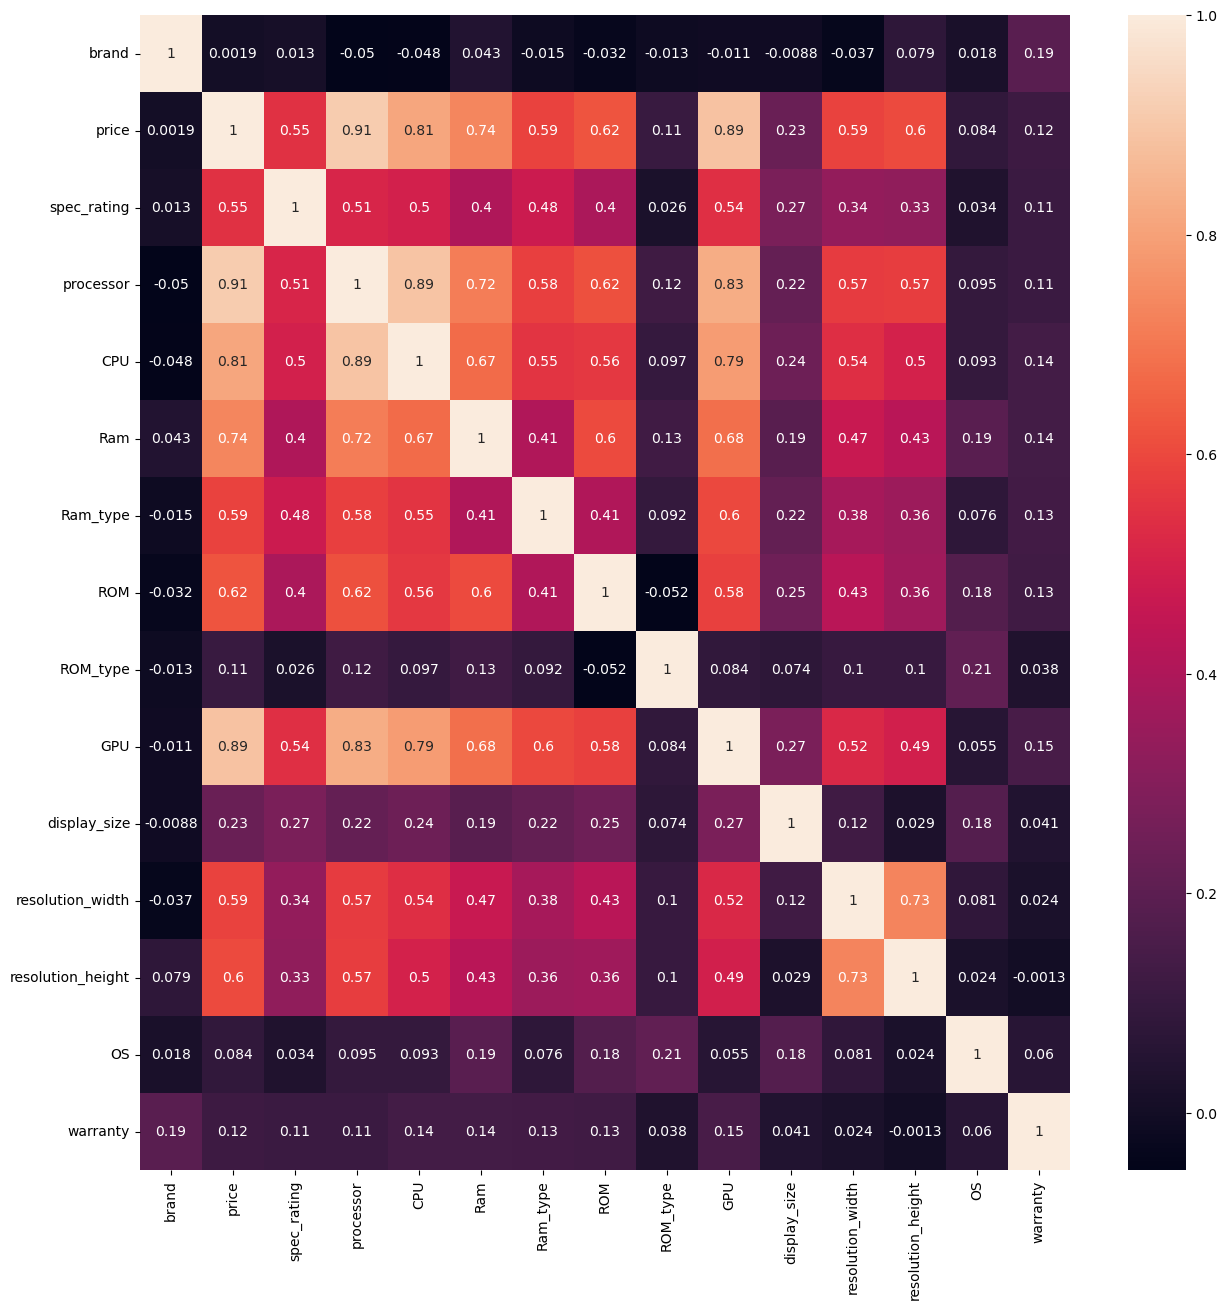

In [167]:
## Correlation check
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [41]:
### Independent and Dependent variables
X=df.drop('price',axis=1)
y=df['price']

In [42]:
## Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [43]:
### Standarlization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [168]:
## Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfreg=RandomForestRegressor()
rfreg.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [169]:
y_rf_pred=rfreg.predict(X_test_scaled)

In [183]:
print('R2_score is : ',round((r2_score(y_test,y_rf_pred))*100,2))

R2_score is :  87.28


## Insights

1.) For training this model, I used Random forest regressor

2.) By Random forest regressor, I got 87.28% accuracy for my model

In [184]:
## Parameter defined for hyperperameter tunning
parameters={'criterion':('squared_error', 'absolute_error', 'friedman_mse', 'poisson'),
           'max_features':('sqrt', 'log2', 'None'),
           'oob_score':(True,False),
           'max_depth':np.linspace(1,100,10,dtype=int)}

In [186]:
## Hyperperameter tunning
from sklearn.model_selection import GridSearchCV
gscv=GridSearchCV(rfreg,param_grid=parameters,scoring='neg_median_absolute_error',cv=5)
gscv.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'),
                         'max_depth': array([  1,  12,  23,  34,  45,  56,  67,  78,  89, 100]),
                         'max_features': ('sqrt', 'log2', 'None'),
                         'oob_score': (True, False)},
             scoring='neg_median_absolute_error')

In [187]:
## Best parameters after hyperperameter tunning
gscv.best_params_

{'criterion': 'squared_error',
 'max_depth': 100,
 'max_features': 'log2',
 'oob_score': True}

In [188]:
y_gscv_pred=gscv.predict(X_test_scaled)

In [191]:
print('R2_score is : ',round((r2_score(y_test,y_gscv_pred))*100,2))

R2_score is :  89.53


## Insights
1.) Best parameters I got after hyperparameter tunning are criterion=squared_error,max_depth=100, max_features=log2 and oob_score=True

2.) After hyperparameter tunning performance of my model gets increased.

3.) After hyperparamter tunning accuracy of my model is 89.53%.